In [5]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Load the dataset
file_path = "Volkswagen_OEM_AsiaPacific_2023_SyntheticDataset_withAge.csv"  # Synthetic Dataset for prototype purposes
data = pd.read_csv(file_path)

# Preprocess the dataset
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['Buying_Date'] = pd.to_datetime(data['Buying_Date'])
data['Efficiency_Score'] = data['Efficiency_Score'].fillna(data['Efficiency_Score'].mean())
data['Energy_Rating'] = data['Energy_Rating'].fillna(data['Energy_Rating'].mean())

In [14]:
data #snippet to out created synthetic data for model simulation purposes

,Timestamp,Factory_ID,Factory_Location,Machine_ID,Machine_Type,Machine_Temperature,Temperature_Current,Buying_Date,Efficiency_Score,Energy_Rating,Energy_Consumption,Season,Operational_Status,Downtime_Probability
0,2023-01-01 00:00:00,VW_01,"Beijing, China",VW_01_M1213,Painting Booth,62.11,-4.06,2017-03-07,0.86,10.34,10.34,Winter,Active,0.01
1,2023-01-01 04:00:00,VW_01,"Beijing, China",VW_01_M8121,Painting Booth,53.14,-8.03,2017-03-07,0.86,10.34,10.34,Winter,Active,0.00
2,2023-01-01 08:00:00,VW_01,"Beijing, China",VW_01_M6069,Painting Booth,70.87,-8.75,2017-03-07,0.87,10.34,10.34,Winter,Active,0.00
3,2023-01-01 12:00:00,VW_01,"Beijing, China",VW_01_M8790,Painting Booth,58.00,9.41,2017-03-07,0.84,10.34,10.34,Winter,Active,0.00
4,2023-01-01 16:00:00,VW_01,"Beijing, China",VW_01_M6119,Painting Booth,59.89,17.37,2017-03-07,0.84,10.34,10.34,Winter,Active,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
867235,2023-12-31 04:00:00,VW_33,"Suzhou, China",VW_33_M8544,Milling,78.26,6.81,2019-06-06,0.90,5.79,5.79,Winter,Active,0.00
867236,2023-12-31 08:00:00,VW_33,"Suzhou, China",VW_33_M3411,Milling,35.53,34.79,2019-06-06,0.90,5.79,5.79,Winter,Active,0.01
867237,2023-12-31 12:00:00,VW_33,"Suzhou, China",VW_33_M9031,Milling,66.93,25.63,2019-06-06,0.89,5.79,5.79,Winter,Active,0.00
867238,2023-12-31 16:00:00,VW_33,"Suzhou, China",VW_33_M2380,Milling,56.98,28.62,2019-06-06,0.91,5.79,5.79,Winter,Active,0.00


***Distribution of Machine Efficiency Scores***

In [ ]:
# --- Plot 1: Efficiency Score Distribution ---
plt.figure(figsize=(10, 6))
sns.histplot(data['Efficiency_Score'], bins=20, kde=True, color='teal')
plt.title("Distribution of Machine Efficiency Scores", fontsize=14)
plt.xlabel("Efficiency Score", fontsize=12)
plt.ylabel("Count of Machines", fontsize=12)
plt.tight_layout()
plt.show()


***Machine Temperature vs Energy Consumption***

In [ ]:
# --- Plot 2: Machine Temperature vs Energy Consumption ---
# Sample data to reduce density (e.g., 500 random samples)
sampled_data = data.sample(500, random_state=42)

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Machine_Temperature', y='Energy_Consumption',
    data=sampled_data, hue='Season', palette='viridis', s=100, alpha=0.6
)
plt.title("Machine Temperature vs Energy Consumption", fontsize=14)
plt.xlabel("Machine Temperature (°C)", fontsize=12)
plt.ylabel("Energy Consumption (kWh)", fontsize=12)
plt.legend(title='Season', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


***Factory Clustering by Energy and Efficiency***

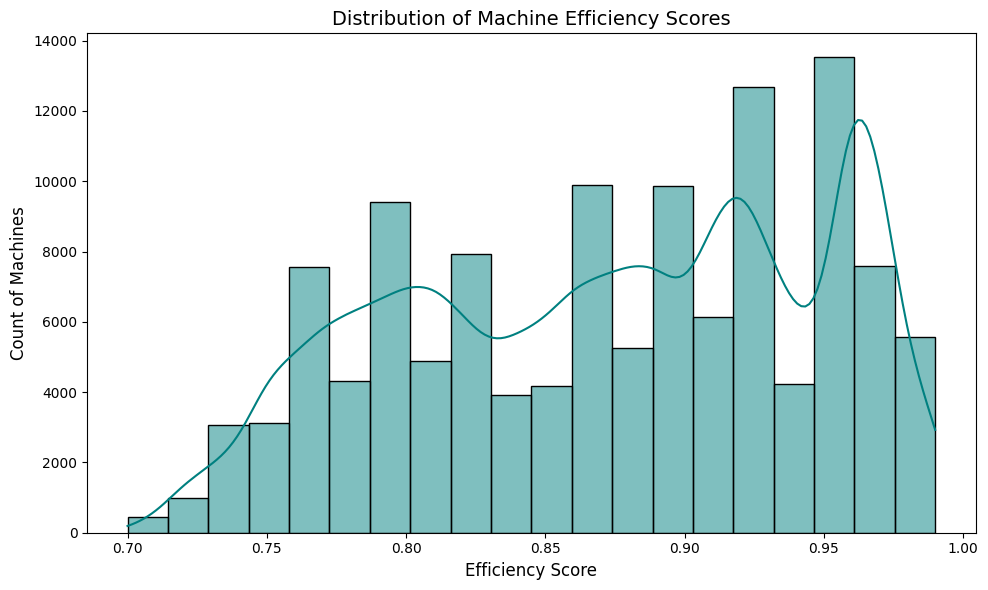

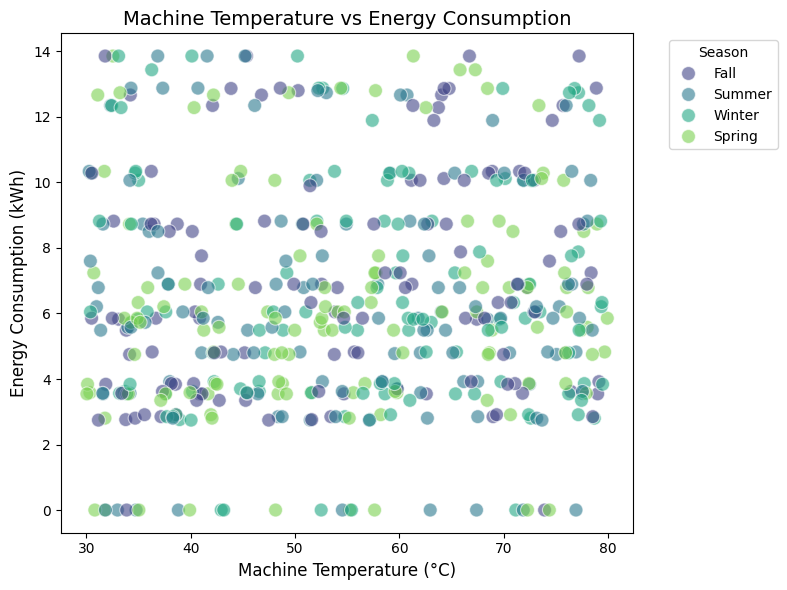

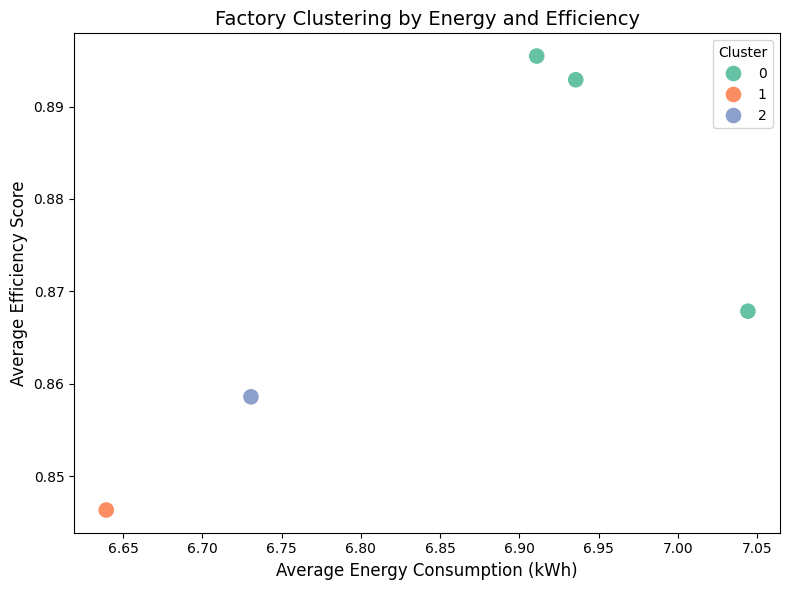

In [3]:
# --- Plot 3: Factory Clustering by Energy and Efficiency ---
# Aggregate data by factory
factory_data = data.groupby('Factory_ID').agg({
    'Energy_Consumption': 'mean',
    'Efficiency_Score': 'mean'
}).reset_index()

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
factory_data['Cluster'] = kmeans.fit_predict(factory_data[['Energy_Consumption', 'Efficiency_Score']])

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Energy_Consumption', y='Efficiency_Score',
    data=factory_data, hue='Cluster', palette='Set2', s=150
)
plt.title("Factory Clustering by Energy and Efficiency", fontsize=14)
plt.xlabel("Average Energy Consumption (kWh)", fontsize=12)
plt.ylabel("Average Efficiency Score", fontsize=12)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

***Pie Chart for machine state***

In [12]:
import plotly.express as px
# Count operational statuses
status_counts = data['Operational_Status'].value_counts().reset_index()
status_counts.columns = ['Operational_Status', 'Count']

# Plot
fig = px.pie(
    status_counts,
    values='Count',
    names='Operational_Status',
    title="Operational Status Distribution",
    hole=0.4
)
fig.show()

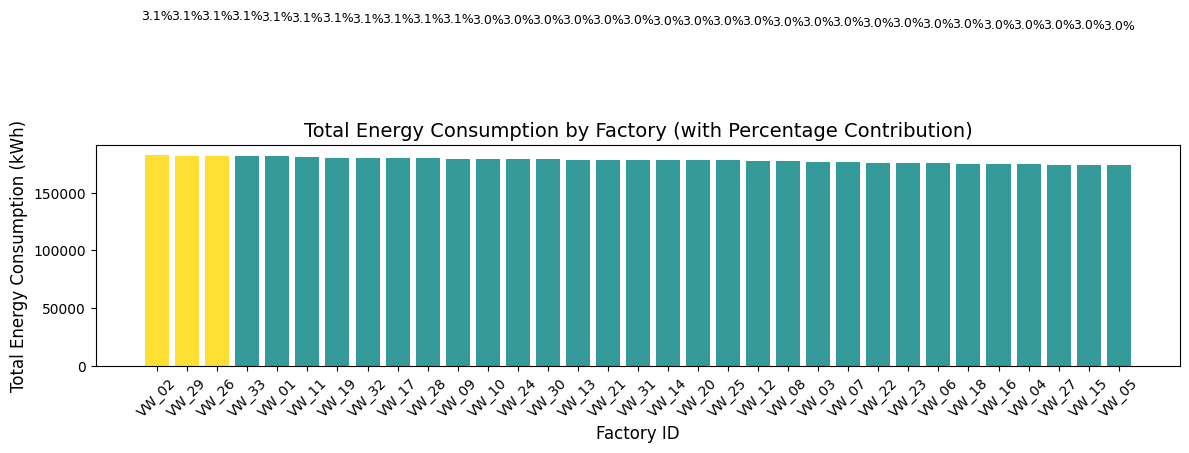

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate total energy consumption by factory and sort
factory_energy = data.groupby('Factory_ID')['Energy_Consumption'].sum().sort_values(ascending=False)

# Calculate percentage contribution
total_energy = factory_energy.sum()
factory_energy_percentage = (factory_energy / total_energy) * 100

# Highlight top 3 contributors
colors = ['teal' if i >= 3 else 'gold' for i in range(len(factory_energy))]

# Create a bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(factory_energy.index, factory_energy, color=colors, alpha=0.8)

# Add percentage labels
for bar, percentage in zip(bars, factory_energy_percentage):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02 * total_energy,
             f"{percentage:.1f}%", ha='center', fontsize=9)

# Add title and labels
plt.title("Total Energy Consumption by Factory (with Percentage Contribution)", fontsize=14)
plt.xlabel("Factory ID", fontsize=12)
plt.ylabel("Total Energy Consumption (kWh)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

***Heat Map for Machine vs Factory vs Energy consumption***

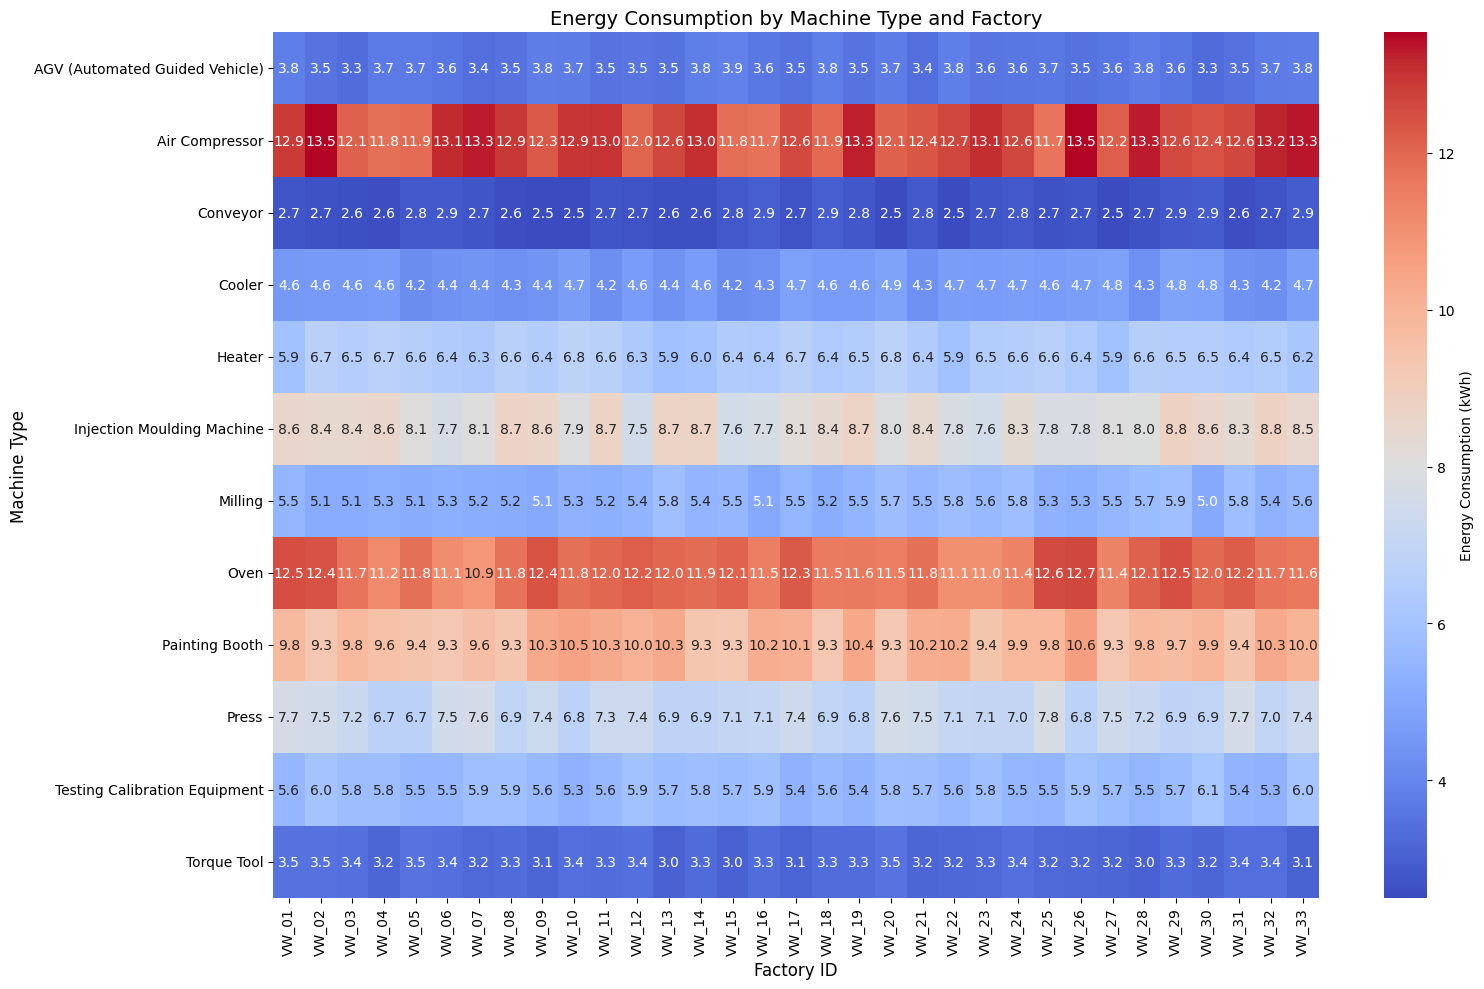

In [7]:
import numpy as np

# Pivot data for heatmap
heatmap_data = data.groupby(['Machine_Type', 'Factory_ID'])['Energy_Consumption'].mean().unstack()

# Plot heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap='coolwarm', cbar_kws={'label': 'Energy Consumption (kWh)'})
plt.title("Energy Consumption by Machine Type and Factory", fontsize=14)
plt.xlabel("Factory ID", fontsize=12)
plt.ylabel("Machine Type", fontsize=12)
plt.tight_layout()
plt.show()


***Average Efficiency Score for Each Machine***

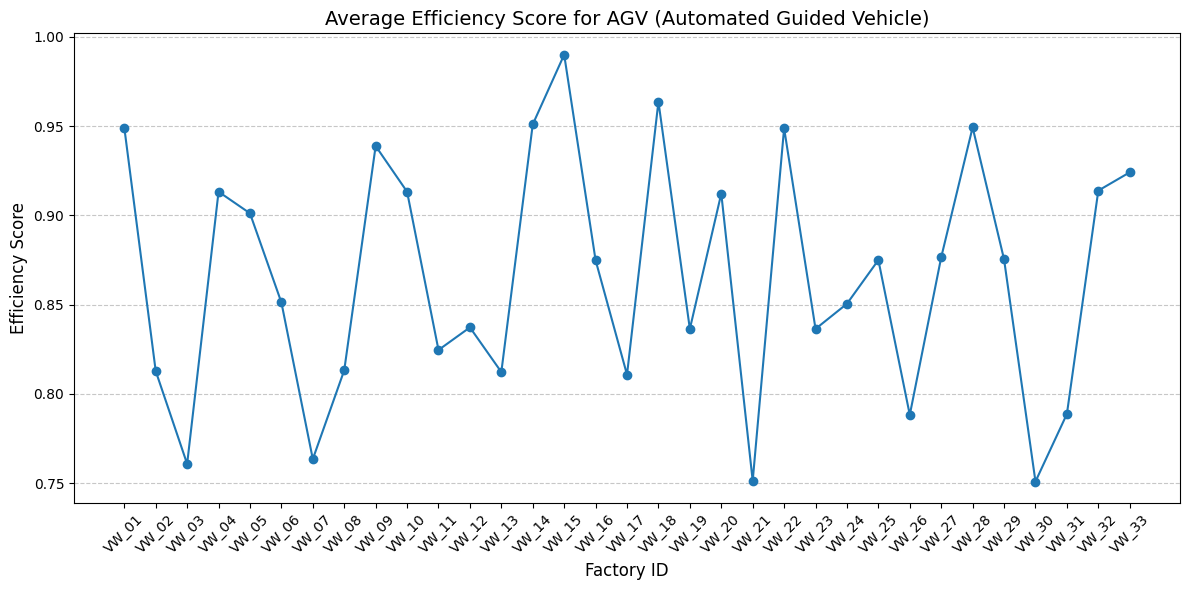

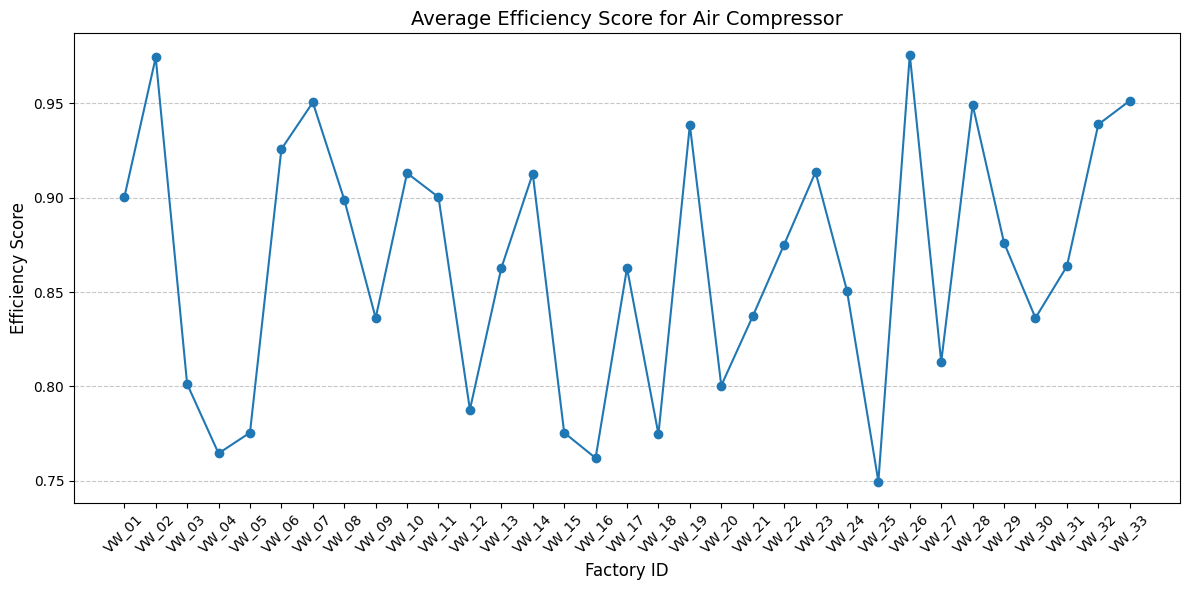

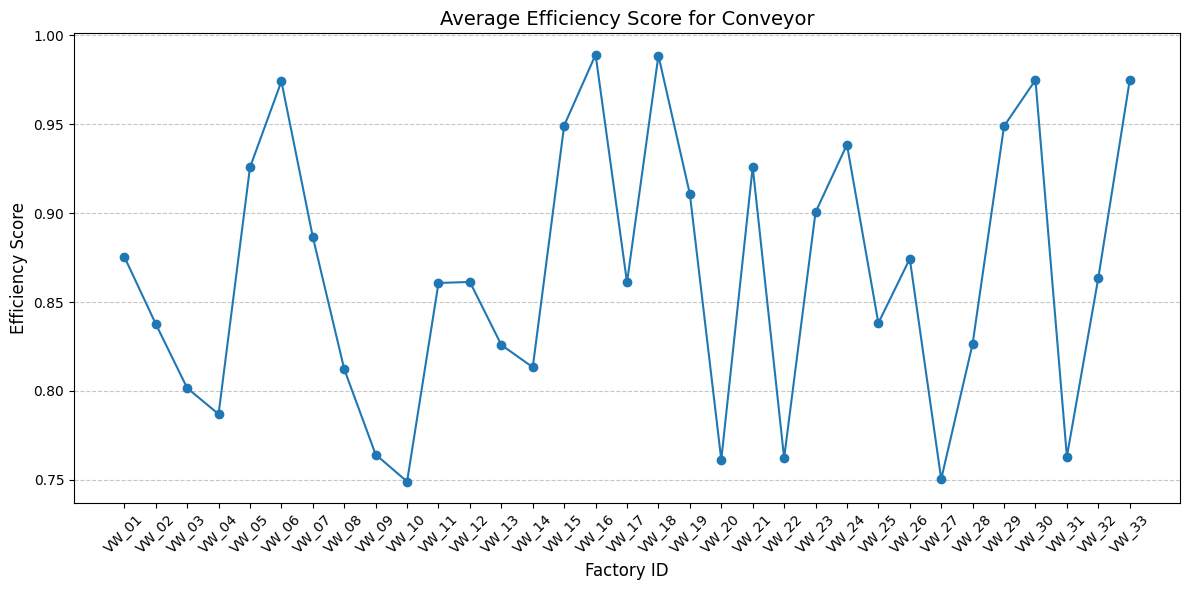

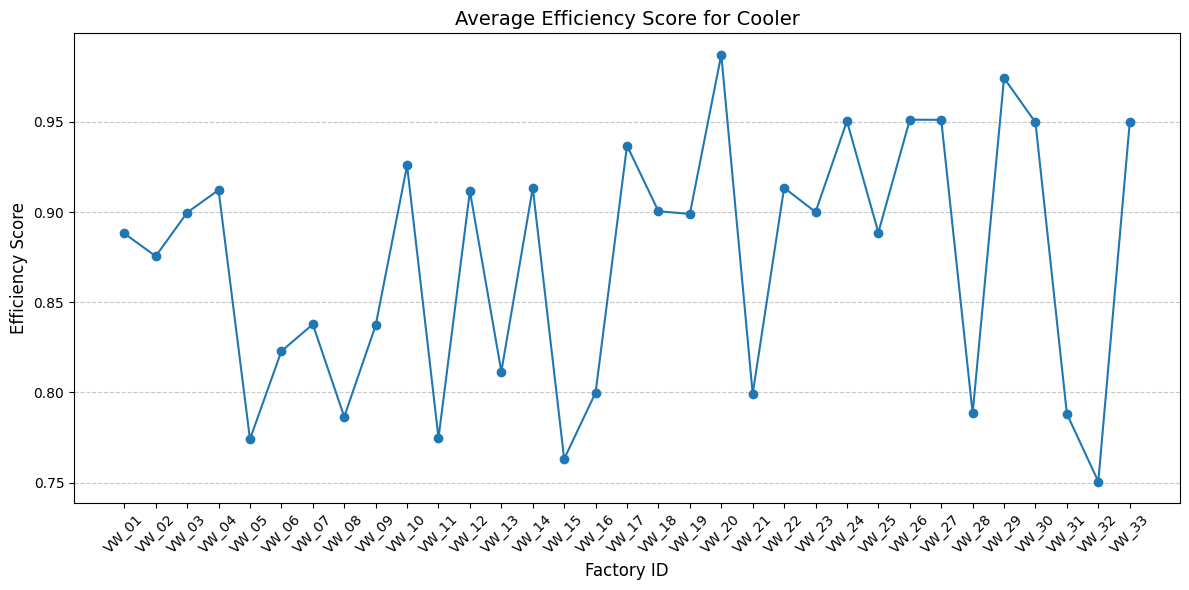

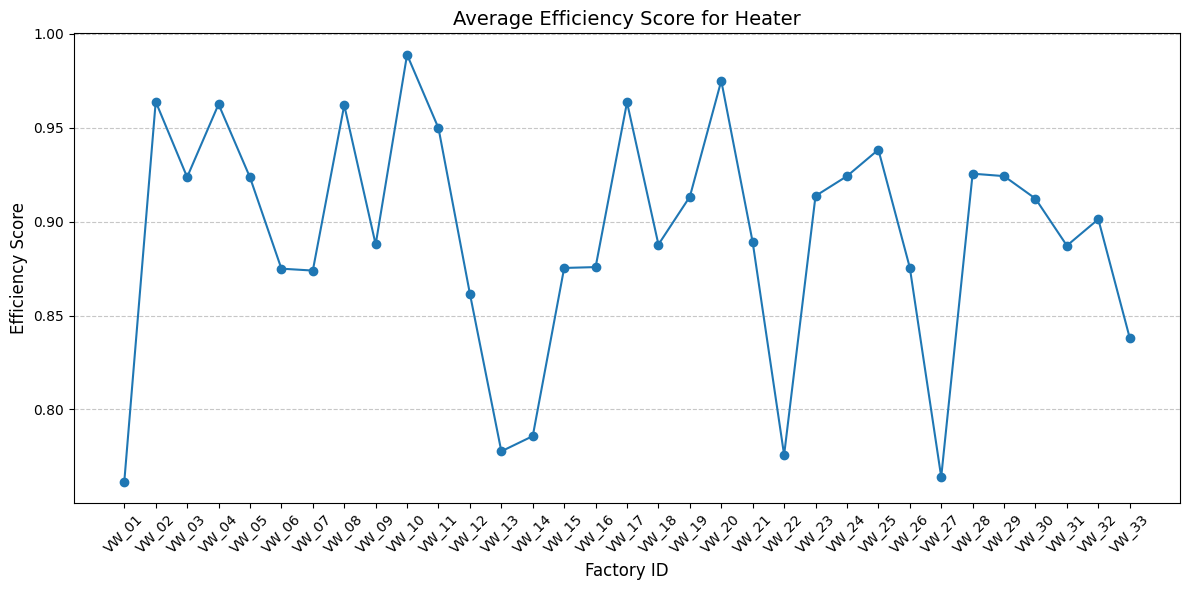

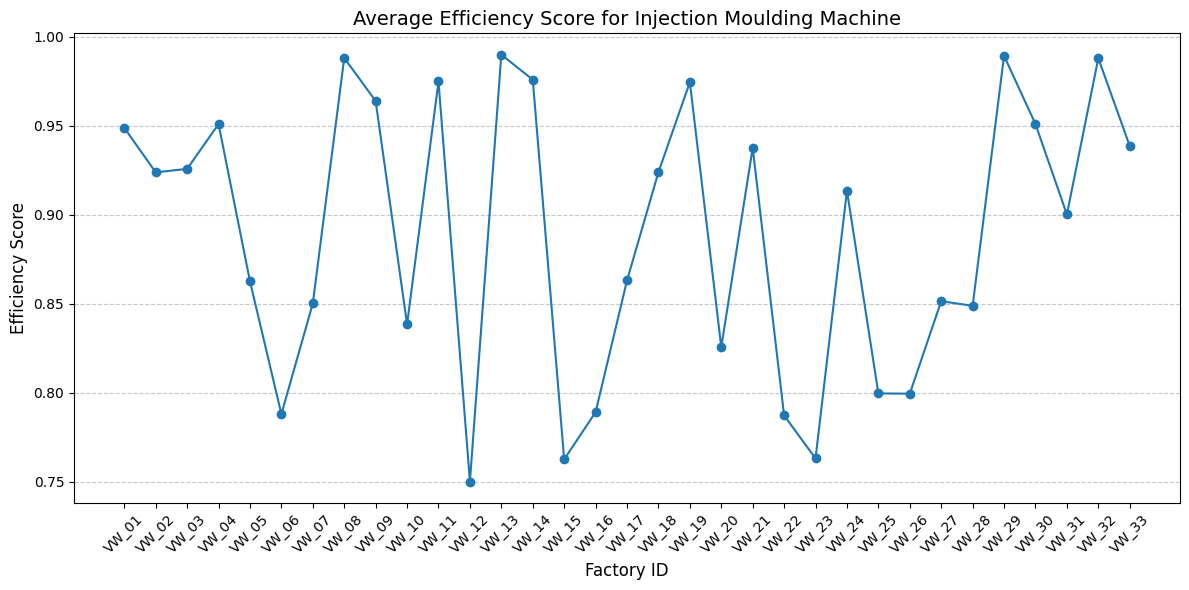

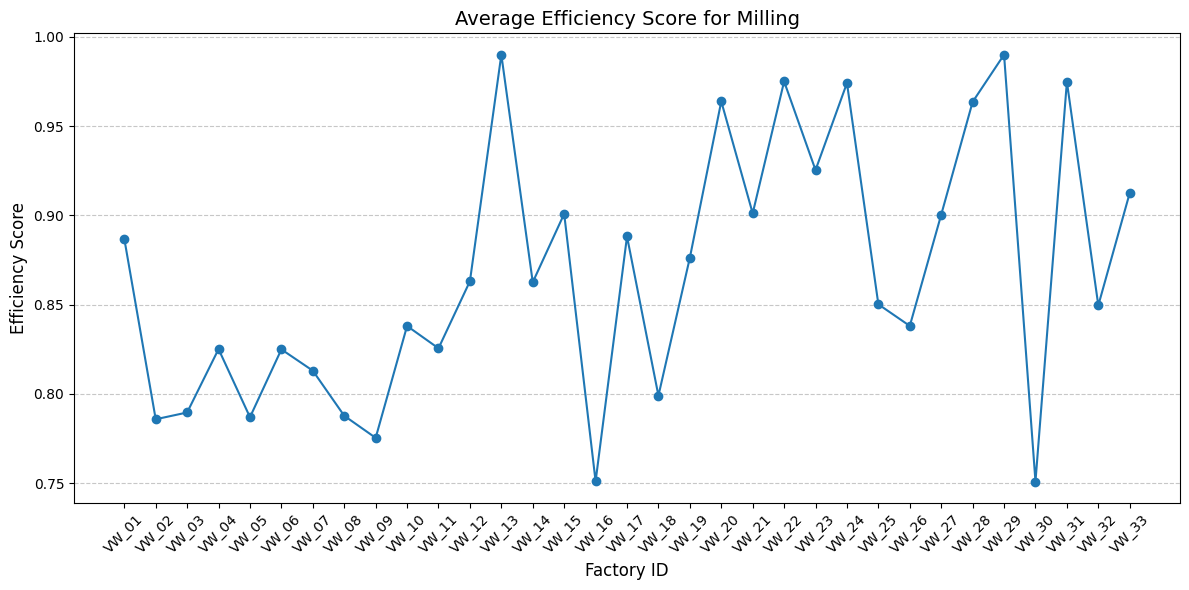

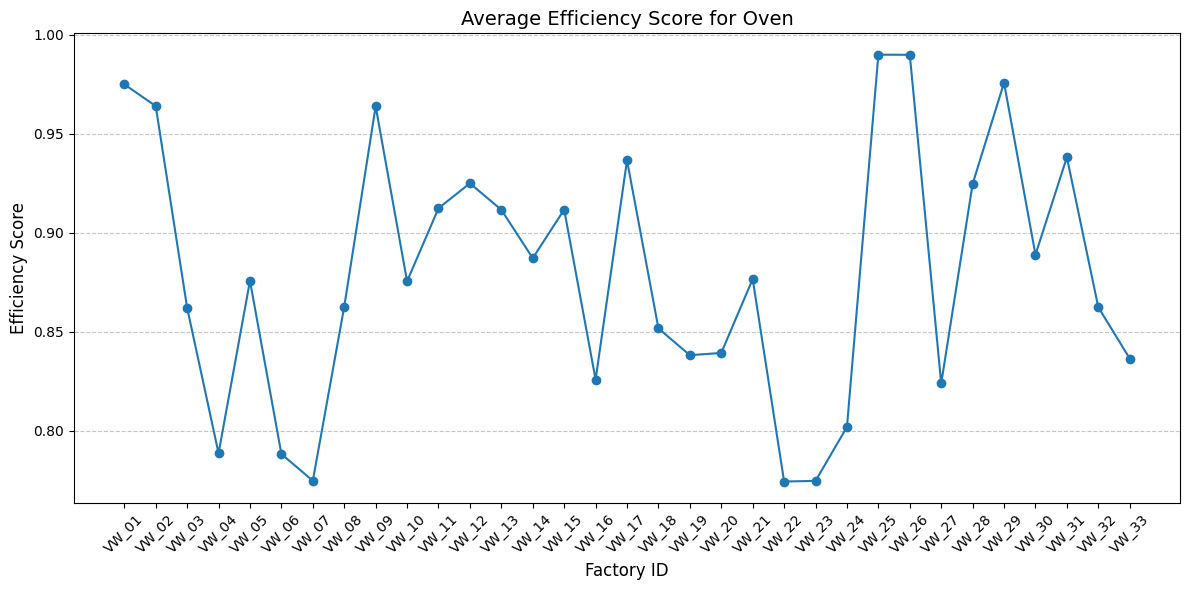

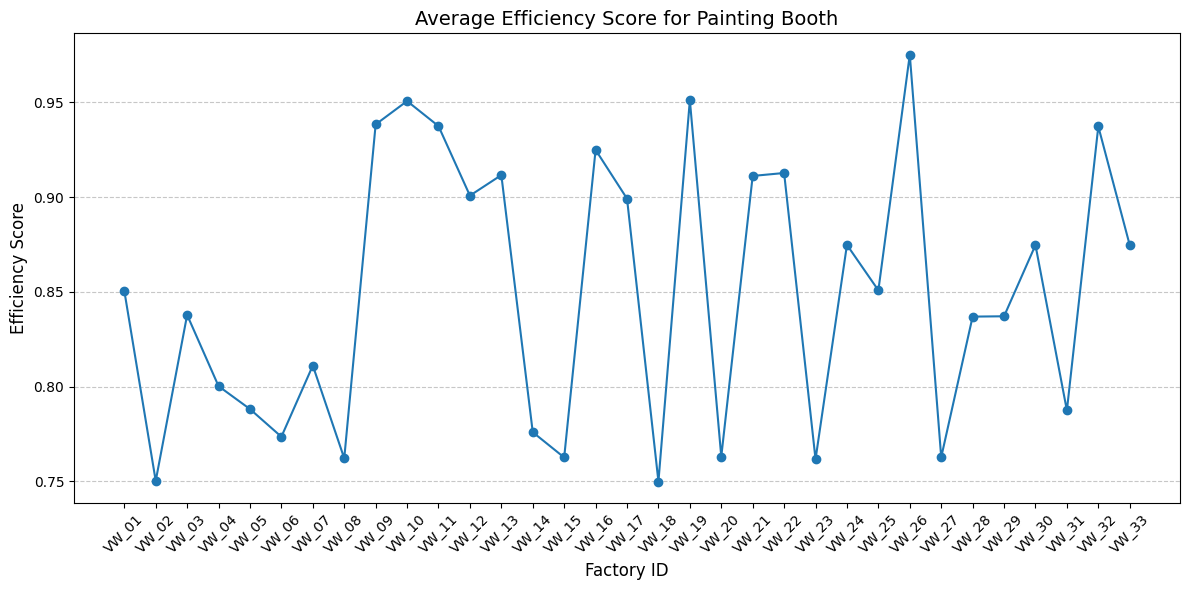

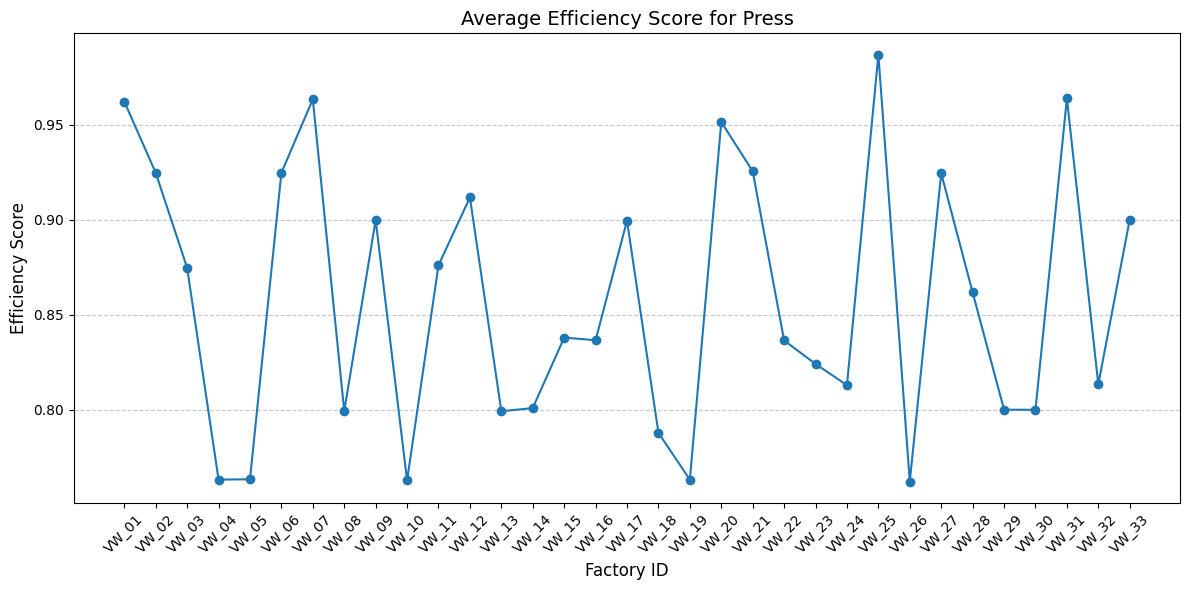

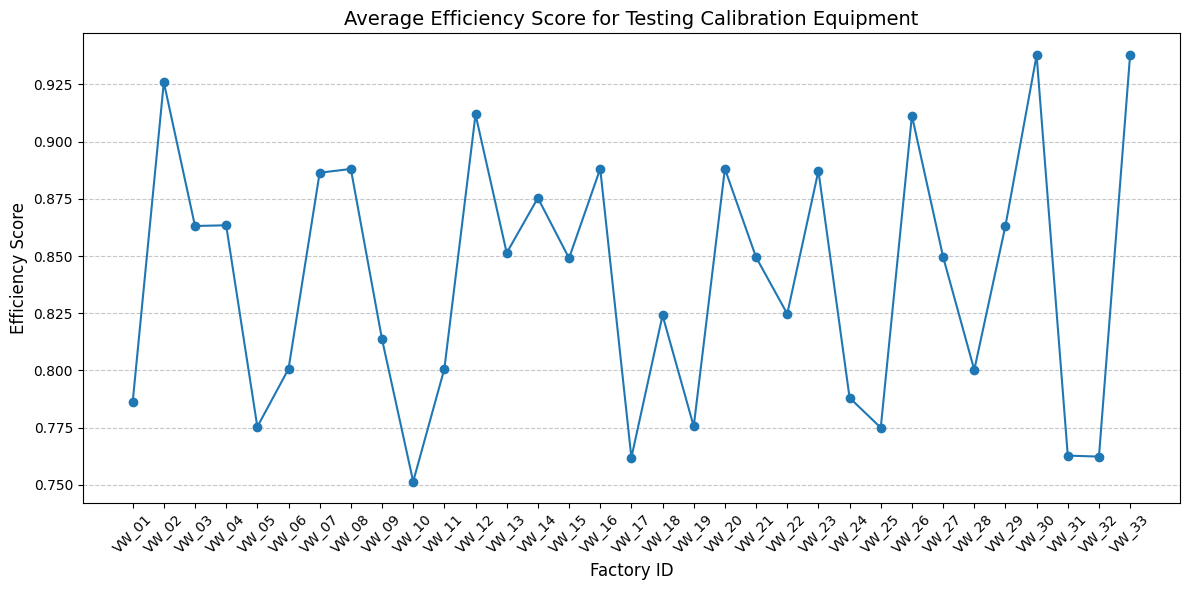

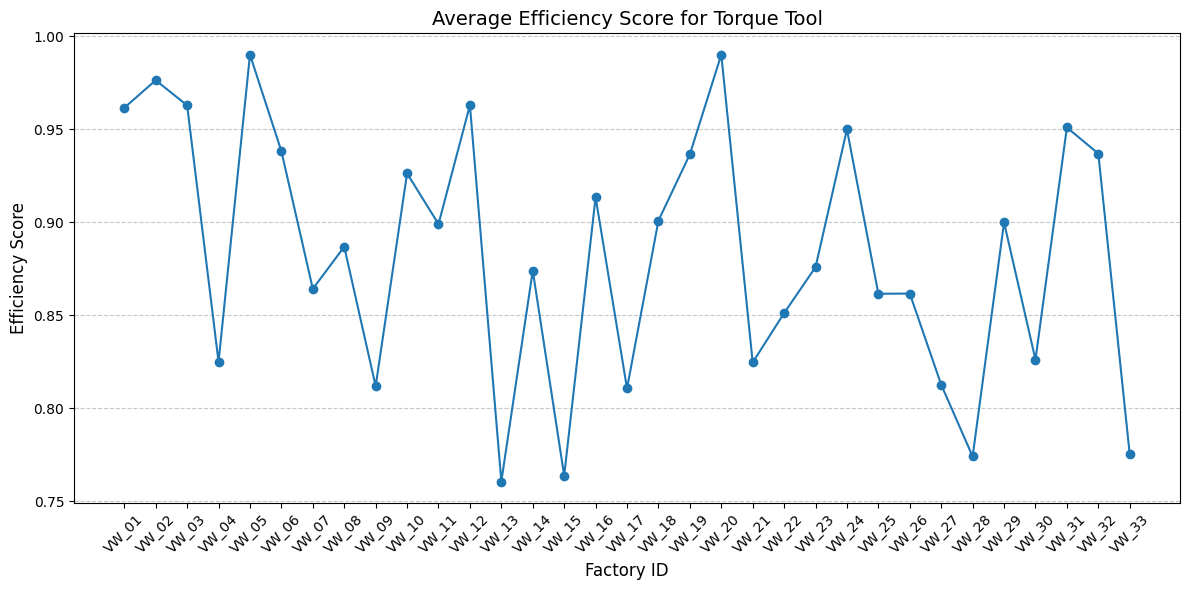

In [8]:
# Calculate average efficiency by machine type and factory
avg_efficiency = data.groupby(['Factory_ID', 'Machine_Type'])['Efficiency_Score'].mean().reset_index()

# Get a list of unique machine types
unique_machines = avg_efficiency['Machine_Type'].unique()

# Create separate line plots for each machine type
for machine in unique_machines:
    # Filter data for the current machine type
    machine_data = avg_efficiency[avg_efficiency['Machine_Type'] == machine]

    # Sort data by efficiency for a cleaner graph
    machine_data = machine_data.sort_values('Factory_ID')

    # Plot
    plt.figure(figsize=(12, 6))
    plt.plot(
        machine_data['Factory_ID'], machine_data['Efficiency_Score'], marker='o', label=f"{machine}"
    )

    # Add labels and title
    plt.title(f"Average Efficiency Score for {machine}", fontsize=14)
    plt.xlabel("Factory ID", fontsize=12)
    plt.ylabel("Efficiency Score", fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

<ipython-input-9-b2c17863b2d8>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


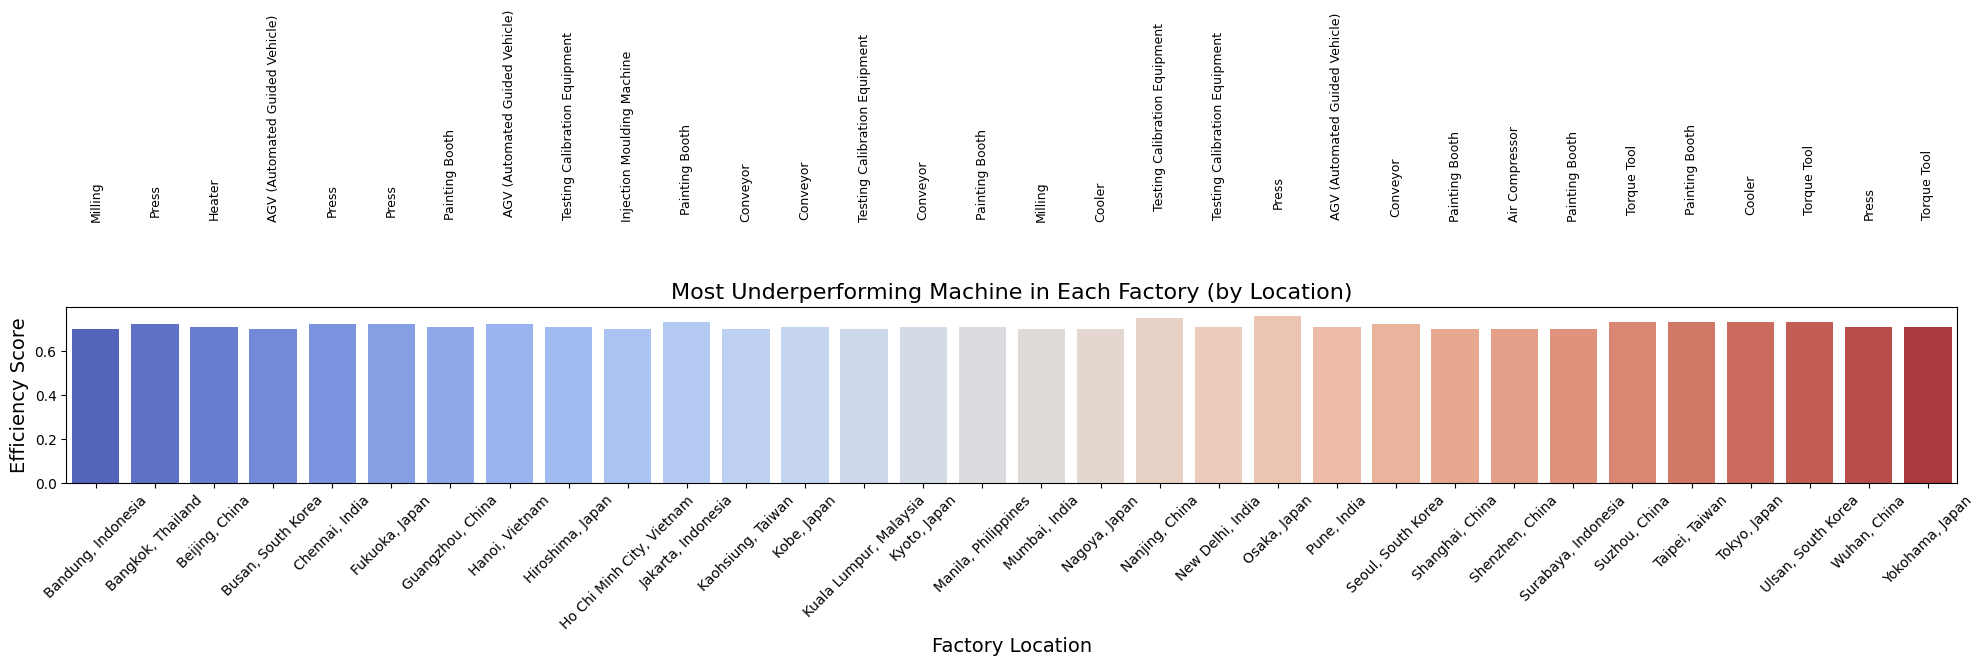

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Identify the most underperforming machine by factory
# Sort by Efficiency Score in ascending order (lower = underperforming)
most_underperforming_machines = (
    data.sort_values(by='Efficiency_Score', ascending=True)
        .groupby('Factory_Location')
        .first()  # Get the most underperforming machine per factory location
        .reset_index()
)

# Step 2: Create the bar plot
plt.figure(figsize=(20, 10))

# Bar plot
sns.barplot(
    x='Factory_Location',
    y='Efficiency_Score',
    data=most_underperforming_machines,
    palette='coolwarm'
)

# Add machine types as labels directly on bars
for index, row in most_underperforming_machines.iterrows():
    plt.text(
        x=index,
        y=row['Efficiency_Score'] + 0.5,  # Slightly above the bar
        s=row['Machine_Type'],
        ha='center', fontsize=9, rotation=90
    )

# Customize the plot
plt.title("Most Underperforming Machine in Each Factory (by Location)", fontsize=16)
plt.xlabel("Factory Location", fontsize=14)
plt.ylabel("Efficiency Score", fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

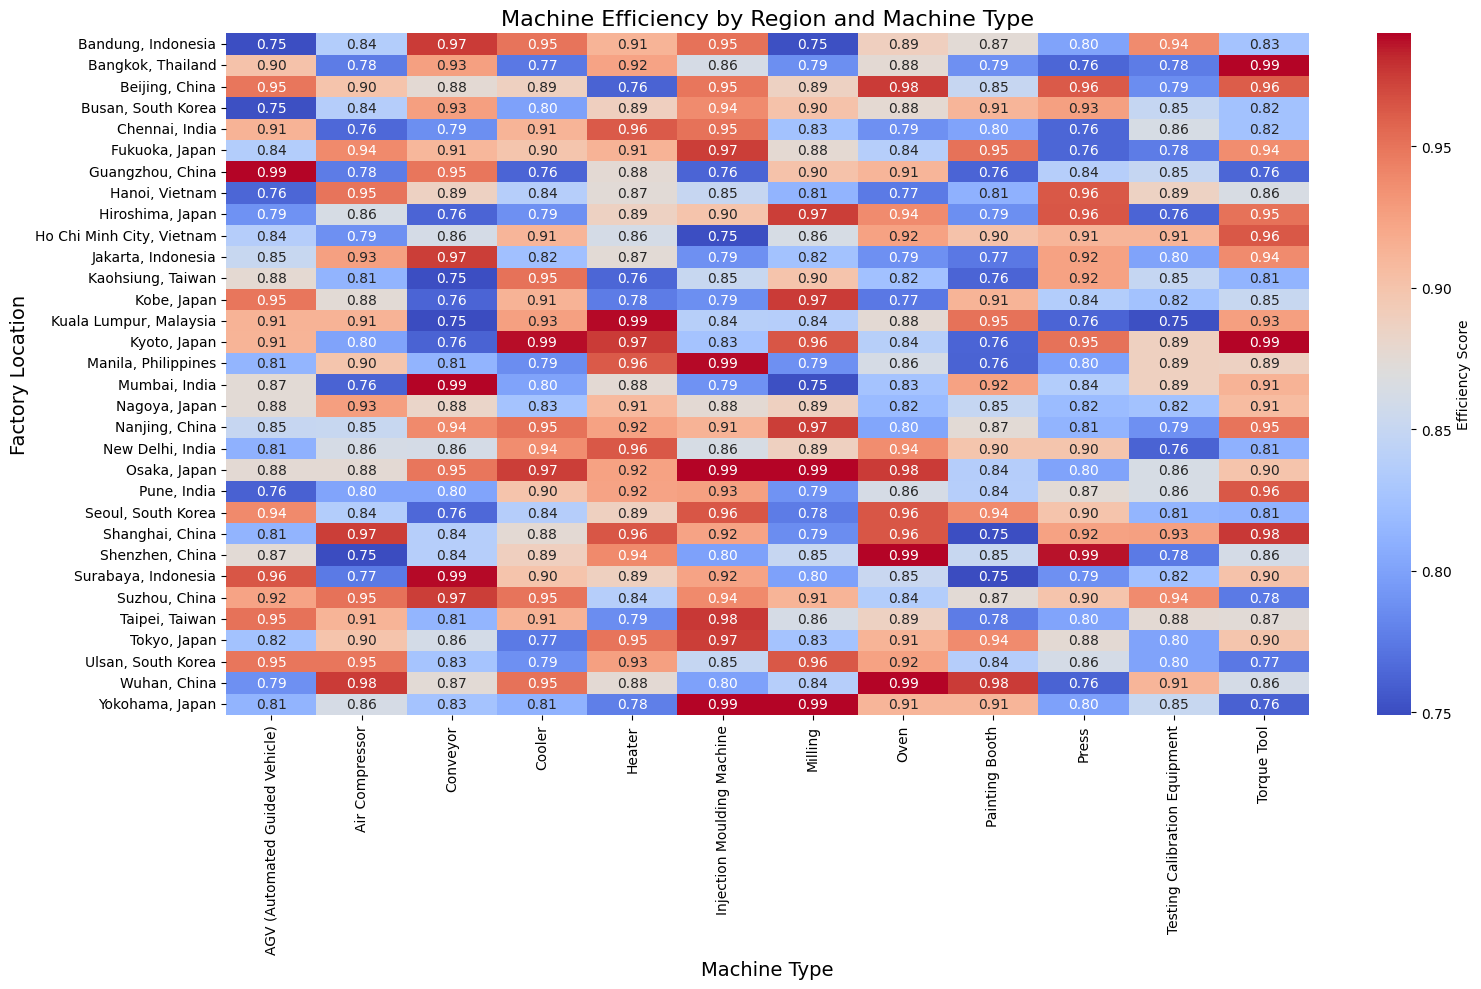

In [10]:
# Group by Factory Location and Machine Type, calculate average Efficiency Score
region_machine_efficiency = data.groupby(['Factory_Location', 'Machine_Type'])['Efficiency_Score'].mean().unstack()

# Plot
plt.figure(figsize=(16, 10))
sns.heatmap(region_machine_efficiency, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Efficiency Score'})
plt.title("Machine Efficiency by Region and Machine Type", fontsize=16)
plt.xlabel("Machine Type", fontsize=14)
plt.ylabel("Factory Location", fontsize=14)
plt.tight_layout()
plt.show()
